In [10]:
import pandas as pd
import pandas_ta as ta
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl, plt

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

In [13]:
#import dados
import yfinance as yf

df_analise = yf.download("AAPL",
                        start="2020-01-01",
                        end="2023-01-01")["Adj Close"]
df_analise = pd.DataFrame(df_analise)
df_analise

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2020-01-02,73.347946
2020-01-03,72.634850
2020-01-06,73.213623
2020-01-07,72.869286
2020-01-08,74.041481
...,...
2022-12-23,131.477127
2022-12-27,129.652435
2022-12-28,125.674019


In [14]:
df_analise['returns'] = df_analise['Adj Close'].pct_change()

In [15]:
#df_analise.set_index('time', inplace=True)
df_analise['Sma_7'] = ta.sma(df_analise['Adj Close'], length=7)
df_analise['Sma_21'] = ta.sma(df_analise['Adj Close'], length=21)
df_analise['Sma_50'] = ta.sma(df_analise['Adj Close'], length=50)

df_analise['Sma_7_return'] = ta.sma(df_analise['returns'], length=7)
df_analise['Sma_21_return'] = ta.sma(df_analise['returns'], length=21)
df_analise['Sma_50_return'] = ta.sma(df_analise['returns'], length=50)

df_analise

,Adj Close,returns,Sma_7,Sma_21,Sma_50,Sma_7_return,Sma_21_return,Sma_50_return
Date,,,,,,,,
2020-01-02,73.347946,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,72.634850,-0.009722,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,73.213623,0.007968,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,72.869286,-0.004703,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-08,74.041481,0.016086,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-12-23,131.477127,-0.002798,133.214918,140.606253,143.640676,-0.011519,-0.006254,-0.001253
2022-12-27,129.652435,-0.013878,132.293315,139.747800,143.478731,-0.006808,-0.005982,-0.000886
2022-12-28,125.674019,-0.030685,131.086828,138.884599,143.156984,-0.009109,-0.006192,-0.002082


In [16]:
df_analise.dropna(inplace=True)

In [17]:
#inicialmente teste com Sma
df_analise['Dist_7'] = df_analise['Adj Close']-df_analise['Sma_7'] 
df_analise['Dist_21'] = df_analise['Adj Close']-df_analise['Sma_21']
df_analise['Dist_50'] = df_analise['Adj Close']-df_analise['Sma_50']

df_analise['Dist_7_return'] = df_analise['returns']-df_analise['Sma_7_return'] 
df_analise['Dist_21_return'] = df_analise['returns']-df_analise['Sma_21_return']
df_analise['Dist_50_return'] = df_analise['returns']-df_analise['Sma_50_return']
df_analise

,Adj Close,returns,Sma_7,Sma_21,Sma_50,Sma_7_return,Sma_21_return,Sma_50_return,Dist_7,Dist_21,Dist_50,Dist_7_return,Dist_21_return,Dist_50_return
Date,,,,,,,,,,,,,,
2020-03-16,59.290058,-0.128647,65.896175,71.045347,74.485917,-0.023239,-0.012158,-0.003408,-6.606117,-11.755289,-15.195859,-0.105408,-0.116489,-0.125239
2020-03-17,61.897041,0.043970,64.631319,70.205025,74.271161,-0.015061,-0.010076,-0.002334,-2.734278,-8.307984,-12.374120,0.059031,0.054046,0.046304
2020-03-18,60.381802,-0.024480,63.949409,69.361906,74.014524,-0.007259,-0.010370,-0.002983,-3.567607,-8.980104,-13.632723,-0.017221,-0.014110,-0.021497
2020-03-19,59.919151,-0.007662,62.531040,68.442902,73.755522,-0.018642,-0.011424,-0.003042,-2.611889,-8.523751,-13.836370,0.010980,0.003762,-0.004620
2020-03-20,56.115154,-0.063485,60.915792,67.381456,73.396995,-0.022750,-0.013959,-0.004634,-4.800638,-11.266301,-17.281841,-0.040735,-0.049526,-0.058852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,131.477127,-0.002798,133.214918,140.606253,143.640676,-0.011519,-0.006254,-0.001253,-1.737791,-9.129126,-12.163549,0.008721,0.003456,-0.001545
2022-12-27,129.652435,-0.013878,132.293315,139.747800,143.478731,-0.006808,-0.005982,-0.000886,-2.640880,-10.095365,-13.826295,-0.007070,-0.007897,-0.012993
2022-12-28,125.674019,-0.030685,131.086828,138.884599,143.156984,-0.009109,-0.006192,-0.002082,-5.412809,-13.210580,-17.482966,-0.021576,-0.024493,-0.028603


In [18]:
def percentil(data, up=90, down=10):
    x = data
    array_x = np.array(x)
    percentil_up = np.percentile(array_x, up)
    percentil_down = np.percentile(array_x, down)
    
    return percentil_up, percentil_down

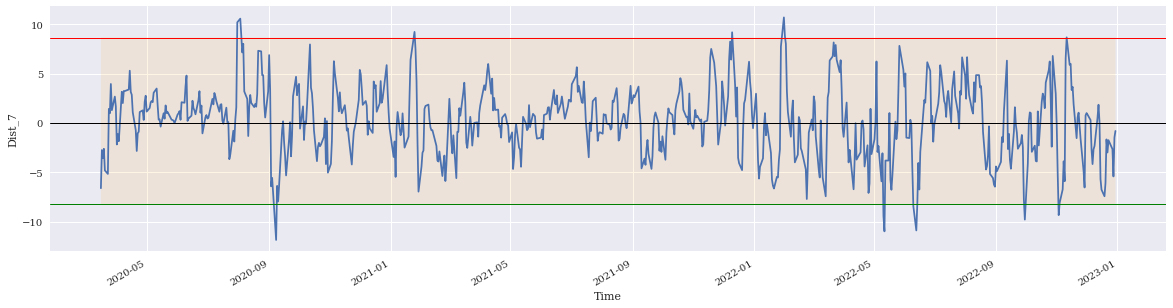

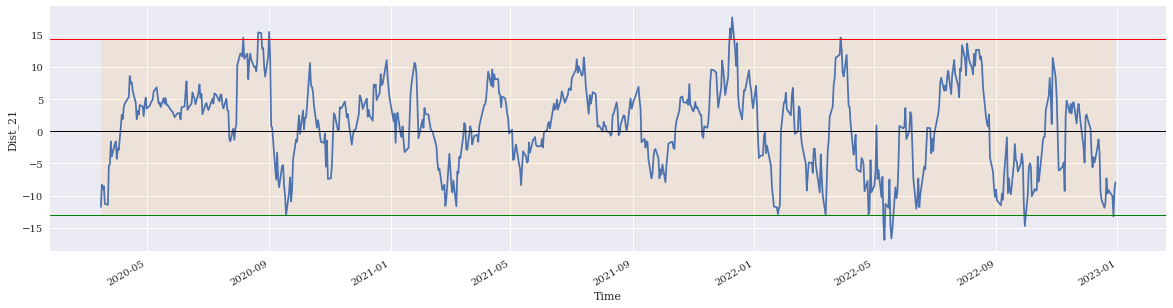

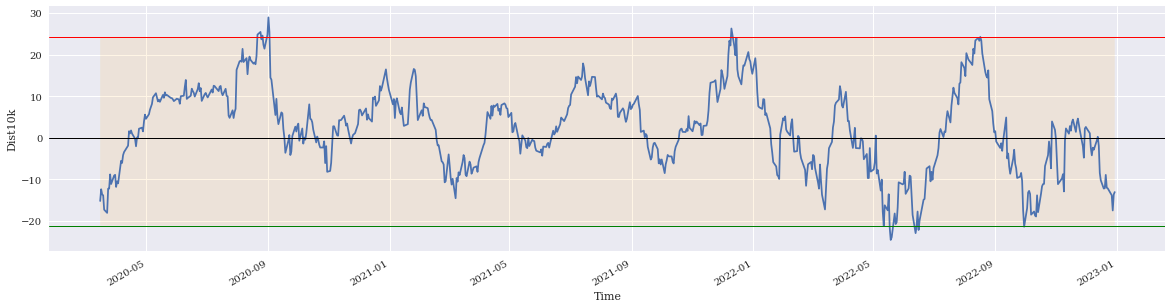

In [21]:
plt.rcParams['figure.figsize'] = (20,5)

per_dist1k = percentil(df_analise['Dist_7'], up=99, down=1)
ax = df_analise['Dist_7'].plot()
ax.fill_between(df_analise.index, per_dist1k[0], per_dist1k[1],facecolor= 'orange', alpha= 0.1)
plt.axhline(per_dist1k[0], color="red", lw=1.0)
plt.axhline(0, color="black", lw=1.0)
plt.axhline(per_dist1k[1], color="green", lw=1.0)
plt.xlabel('Time')
plt.ylabel('Dist_7')
plt.show()

per_dist5k = percentil(df_analise['Dist_21'], up=99, down=1)
ax = df_analise['Dist_21'].plot()
ax.fill_between(df_analise.index, per_dist5k[0], per_dist5k[1],facecolor= 'orange', alpha= 0.1)
plt.axhline(per_dist5k[0], color="red", lw=1.0)
plt.axhline(0, color="black", lw=1.0)
#plt.axhline(10.0, color="grey", lw=1.0)
plt.axhline(per_dist5k[1], color="green", lw=1.0)
plt.xlabel('Time')
plt.ylabel('Dist_21')
plt.show()

per_dist10k = percentil(df_analise['Dist_50'], up=99, down=1)
ax = df_analise['Dist_50'].plot()
ax.fill_between(df_analise.index, per_dist10k[0], per_dist10k[1],facecolor= 'orange', alpha= 0.1)
plt.axhline(per_dist10k[0], color="red", lw=1.0)
plt.axhline(0, color="black", lw=1.0)
#plt.axhline(10.0, color="grey", lw=1.0)
plt.axhline(per_dist10k[1], color="green", lw=1.0)
plt.xlabel('Time')
plt.ylabel('Dist10k')
plt.show()

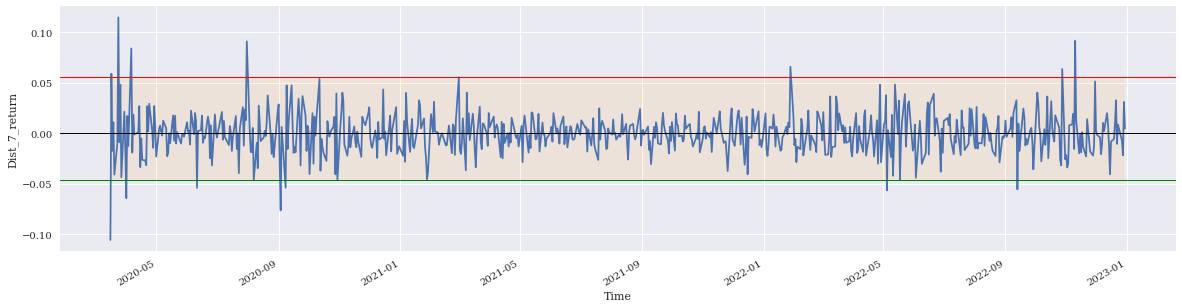

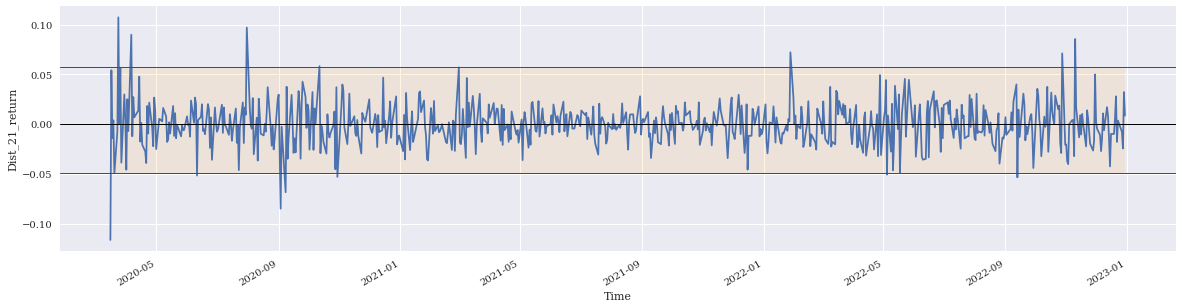

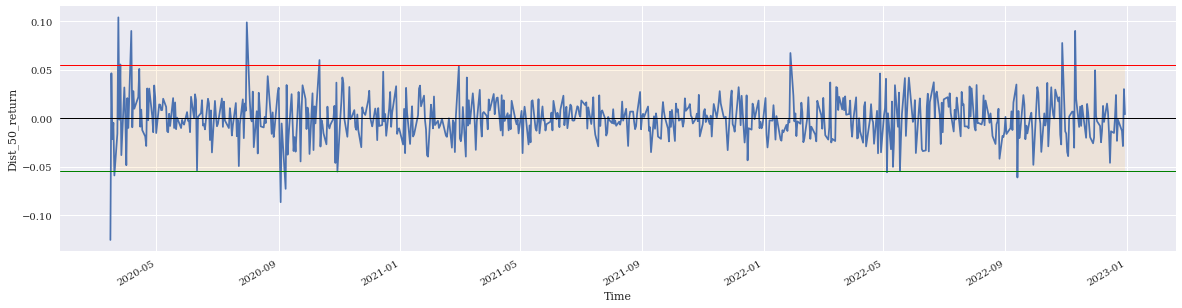

In [20]:
plt.rcParams['figure.figsize'] = (20,5)

per_dist1k = percentil(df_analise['Dist_7_return'], up=99, down=1)
ax = df_analise['Dist_7_return'].plot()
ax.fill_between(df_analise.index, per_dist1k[0], per_dist1k[1],facecolor= 'orange', alpha= 0.1)
plt.axhline(per_dist1k[0], color="red", lw=1.0)
plt.axhline(0, color="black", lw=1.0)
plt.axhline(per_dist1k[1], color="green", lw=1.0)
plt.xlabel('Time')
plt.ylabel('Dist_7_return')
plt.show()

per_dist5k = percentil(df_analise['Dist_21_return'], up=99, down=1)
ax = df_analise['Dist_21_return'].plot()
ax.fill_between(df_analise.index, per_dist5k[0], per_dist5k[1],facecolor= 'orange', alpha= 0.1)
plt.axhline(per_dist5k[0], color="red", lw=1.0)
plt.axhline(0, color="black", lw=1.0)
#plt.axhline(10.0, color="grey", lw=1.0)
plt.axhline(per_dist5k[1], color="green", lw=1.0)
plt.xlabel('Time')
plt.ylabel('Dist_21_return')
plt.show()

per_dist10k = percentil(df_analise['Dist_50_return'], up=99, down=1)
ax = df_analise['Dist_50_return'].plot()
ax.fill_between(df_analise.index, per_dist10k[0], per_dist10k[1],facecolor= 'orange', alpha= 0.1)
plt.axhline(per_dist10k[0], color="red", lw=1.0)
plt.axhline(0, color="black", lw=1.0)
#plt.axhline(10.0, color="grey", lw=1.0)
plt.axhline(per_dist10k[1], color="green", lw=1.0)
plt.xlabel('Time')
plt.ylabel('Dist_50_return')
plt.show()